#Ejercicios Open Source con sklearn.datasets

##Regresión lineal al dataset impuesto_gasolina

###Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
%matplotlib inline

###Cargamos el dataset


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

###Conociendo los datos que tiene el dataset

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])




*   Datos/data: contiene la información de varias casas
*   feature_names: nombres de las características
*   DESCR: describe el conjunto de datos
*   **objetivos/target: Los precios de la casa (caracteristica más relevante)**


---
Conociendo las caracteristicas que tienen los datos:






In [ ]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

*   CRIM: Tasa de delincuencia per cápita por ciudad
*   ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
*   INDUS: Proporción de acres comerciales no minoristas por ciudad
*   CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
*   NOX: concentración de óxido nítrico (partes por 10 millones)
*   RM: Número medio de habitaciones por vivienda
*   EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD: Índice de accesibilidad a carreteras radiales
*   TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
*   PTRATIO: Proporción alumno/profesor por sector
*   B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
*   LSTAT: porcentaje de la población de menor estatus
*   MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)






###Creamos una tabla de datos usando pandas
(facilita el manejo de los datos)

In [2]:
#Creamos una tabla (tipo excel con PANDAS, con titulos para facilitar la manipulación)
boston = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/petrol_consumption.csv')
boston.head(10) #Imprimimos las primeras 10 filas

,gasolina_impuesto,ingreso_promedio,carreteras_pavimentadas,porcen_licencias_conducion_poblacion,gasolina_Consumo
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


Podemos ver que el valor de destino falta en los datos. Creamos una nueva columnna de valores de destino y la agregamos a la tabla, la llamamos MEDV

In [3]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target
boston.head(10)

NameError: ignored

###Conociendo los datos

In [ ]:
#Cuantos registros tiene el dataset (rowsXcolumns)
#boston.shape
#boston.index
#Cuántos datos tiene cada registro (columns)
#boston.shape[1]
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()
#boston.isnull().values.any()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Que hacer cuando tengo datos nulos ??

https://www.datasource.ai/es/data-science-articles/4-funciones-de-python-pandas-imprescindibles-para-el-analisis-de-series-temporales

### Graficando los valores

Revisemos la estimación de la densidad del kernel de los valores de las casas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


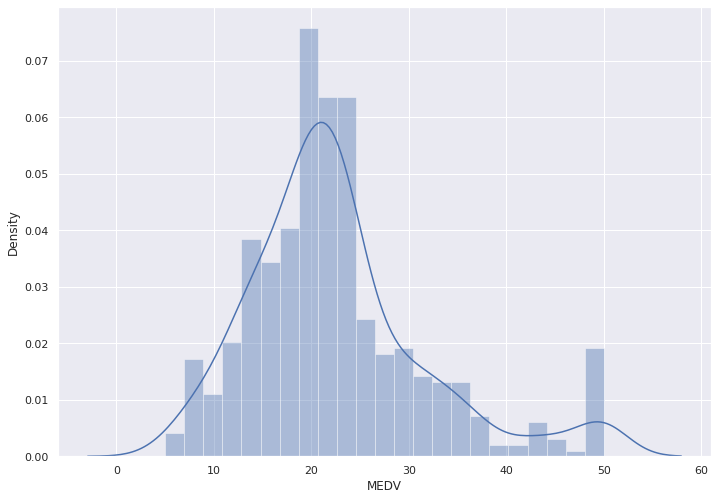

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Tamaño del grafico
sns.distplot(boston['MEDV'])
plt.show()

###Matriz de correlación
Para medir las relaciones lineales entre las variables y de esa forma determinar que valores son más practicos para entregar un modelo de regresión lineal.

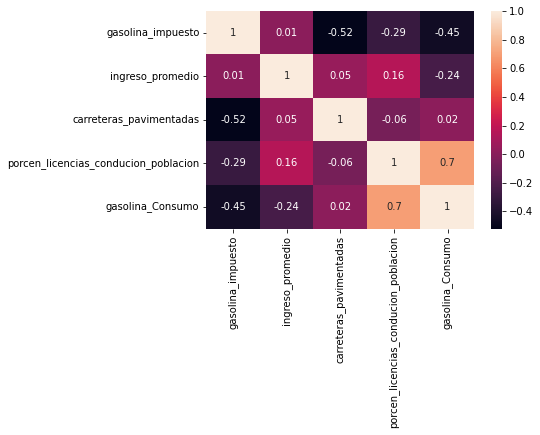

In [4]:
#Funcipon de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
#annot = True #(Para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True,)

Se deben seleccionar aquellas características que tienen una alta correlación (ya se positiva o negativa) con nuestra variable de destino (MEDV). 

Entre 0.7 a 0.74 sea positivo o negativo:
MEDV 	<->	RM
MEDV	<->	LSTAT
Se deben descartar las características que tengan multi-colinealidad (correlación utópica que solo se podría dar en laboratorio), son aquellas que tengan valores superiores 0,74:
RAD<->TAX 
DIS<->AGE

Usaremos un gráfico de dispersión para ver cómo estas características varían 

RM vs MEDV
LSTAT vs MEDV


###Graficando variables descartadas

Si no creemos en tablas, pues generamos graficas de comparación entre variables y a ojo descartamos

In [5]:
boston[1:1]

,gasolina_impuesto,ingreso_promedio,carreteras_pavimentadas,porcen_licencias_conducion_poblacion,gasolina_Consumo


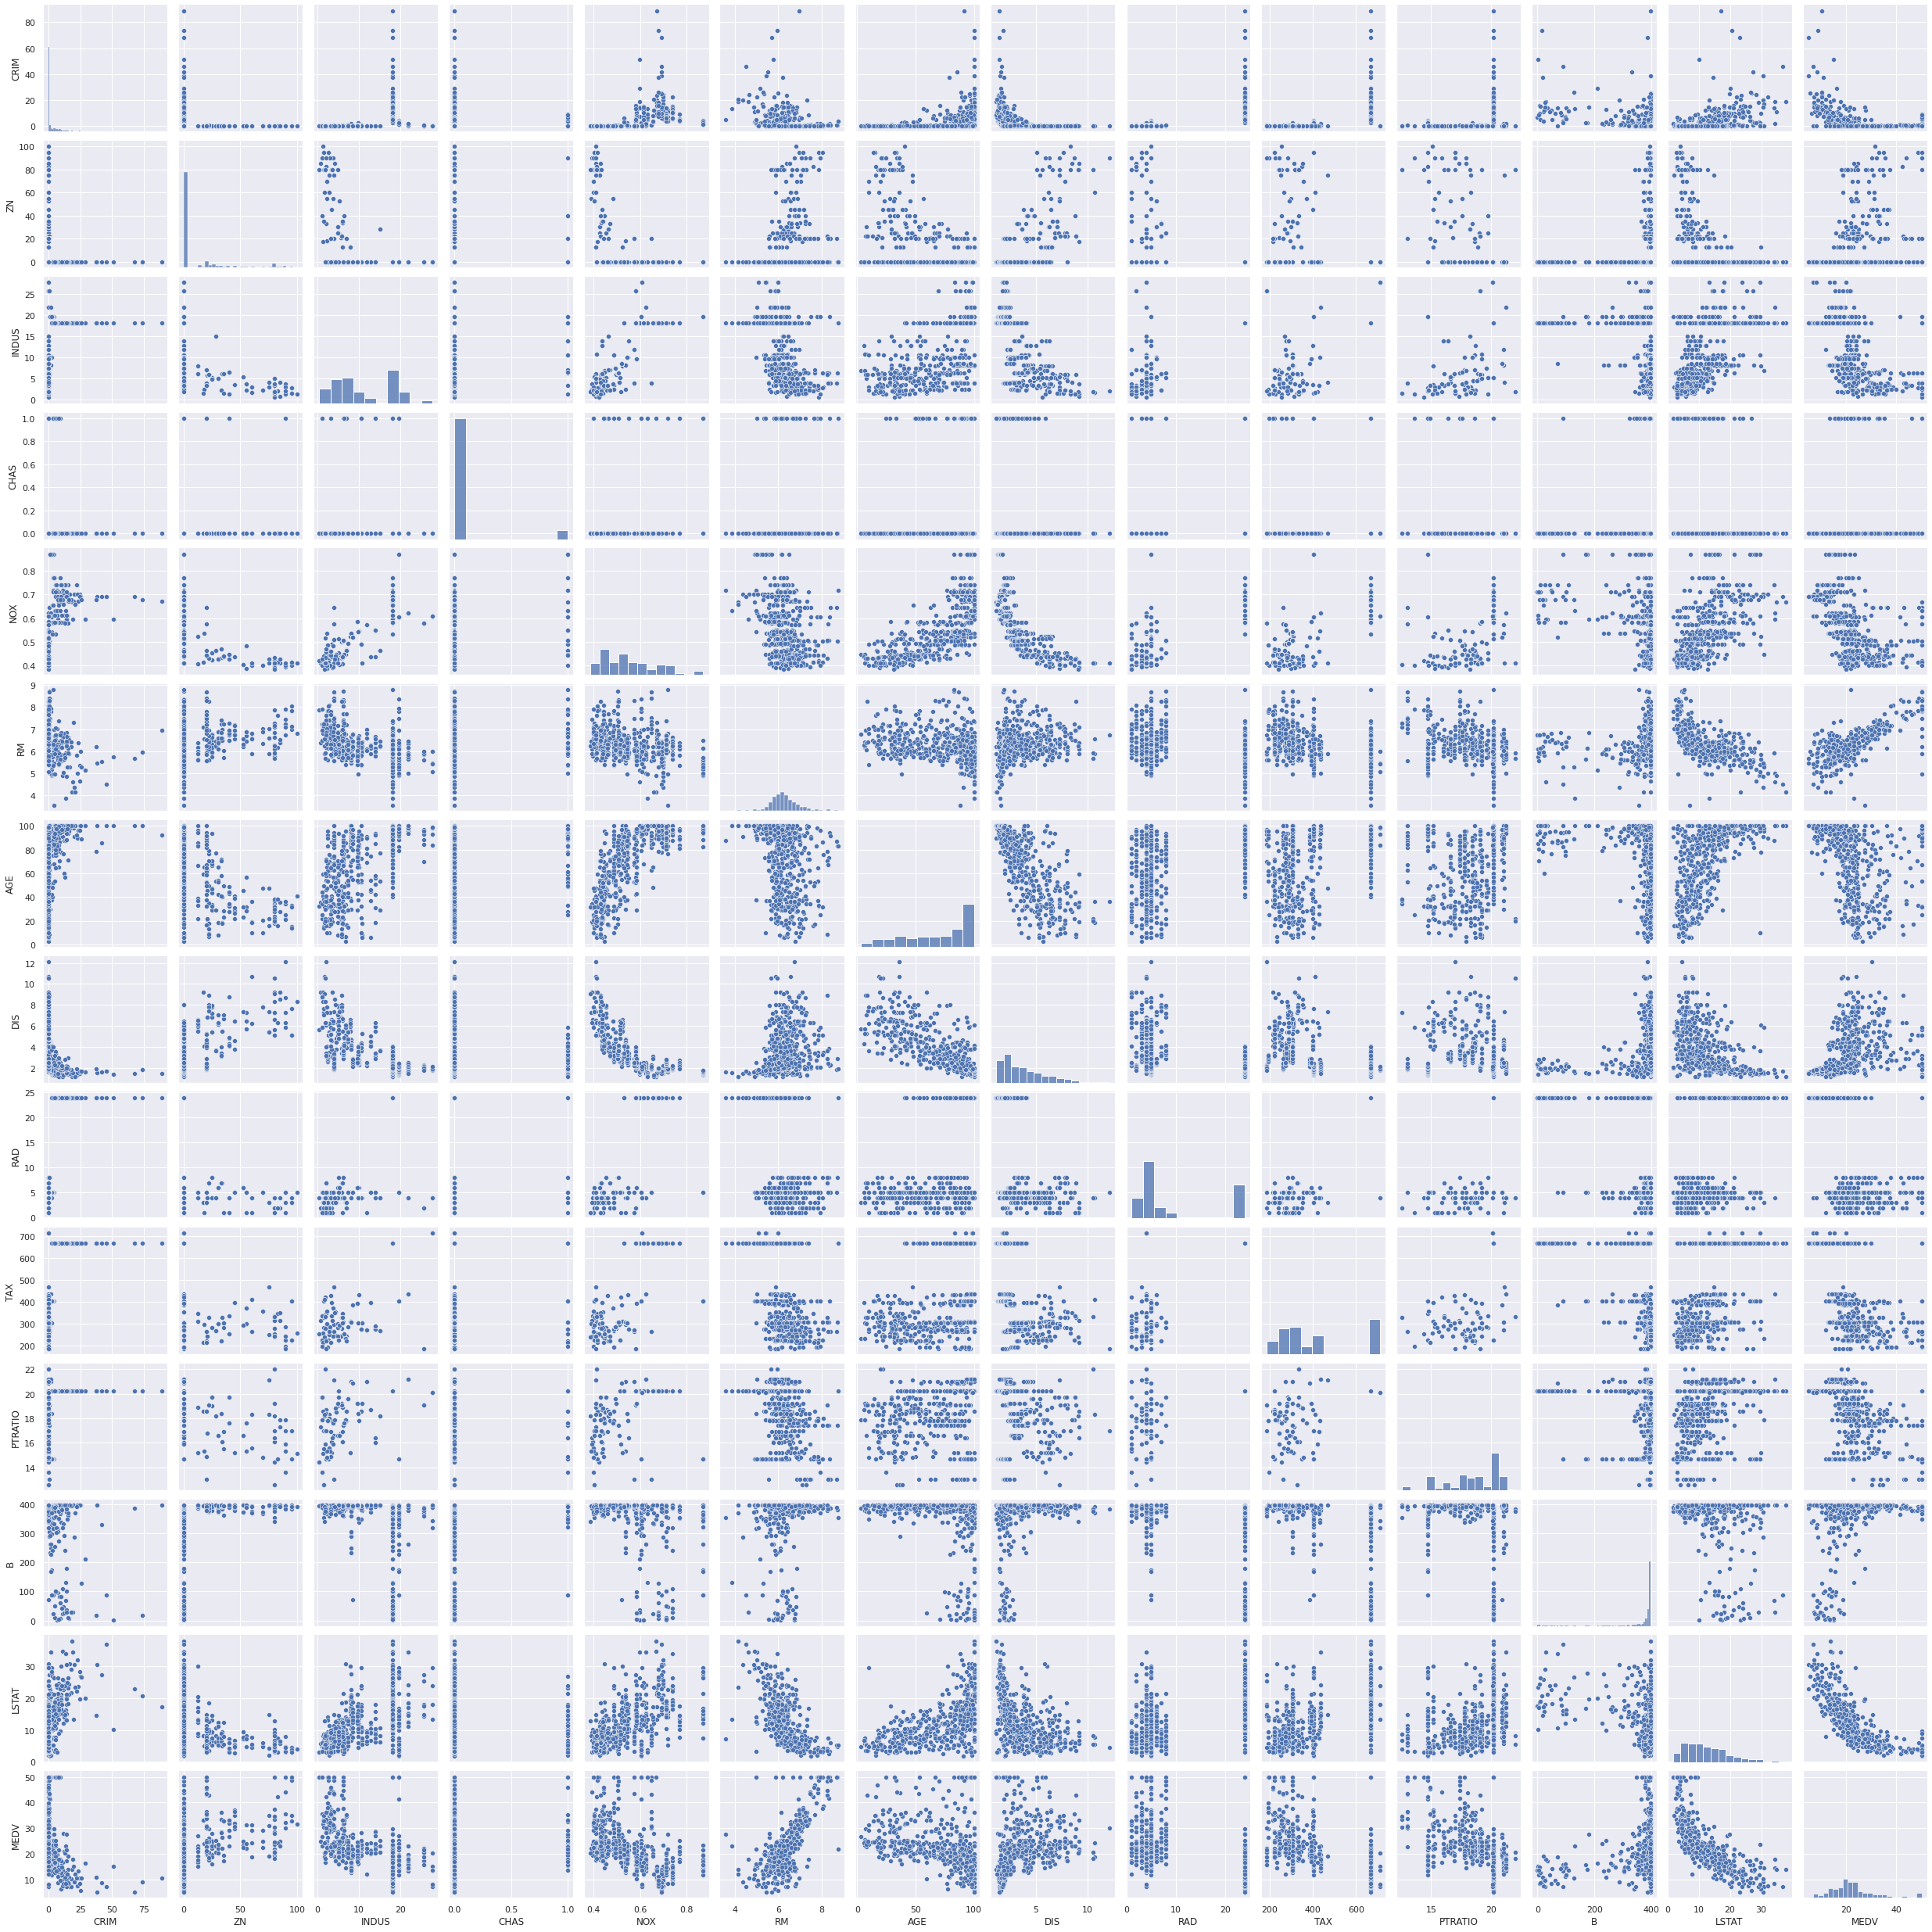

In [ ]:
sns.pairplot(boston);

####Descartando RAD vs TAX

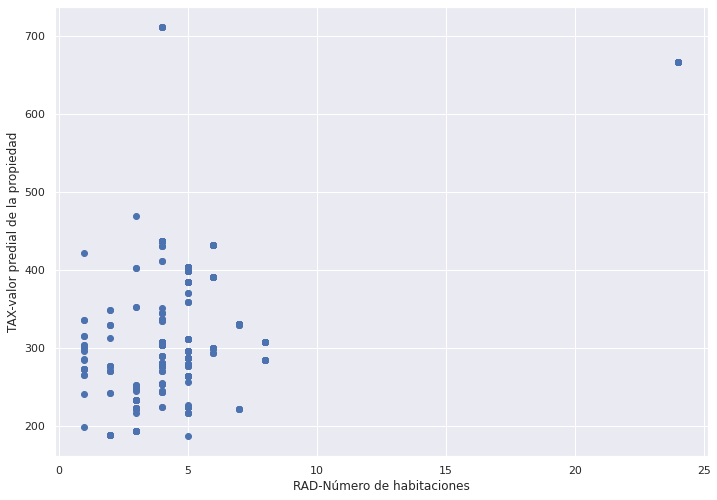

In [ ]:
x = boston['RAD']
y = boston['TAX']
plt.scatter(x,y)
plt.xlabel('RAD-Número de habitaciones')
plt.ylabel('TAX-valor predial de la propiedad')
plt.show()

####descartando DIS vs AGE

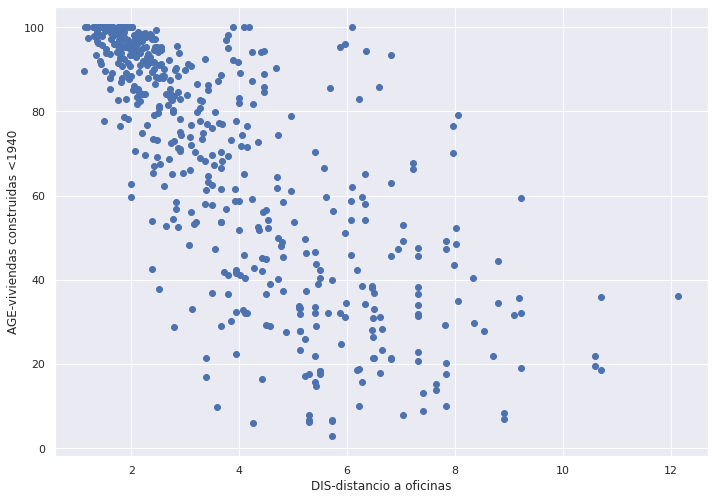

In [ ]:
x = boston['DIS']
y = boston['AGE']
plt.scatter(x,y)
plt.xlabel('DIS-distancio a oficinas')
plt.ylabel('AGE-viviendas construidas <1940')
plt.show()

###Graficando variables seleccionadas

MEDV vs RM

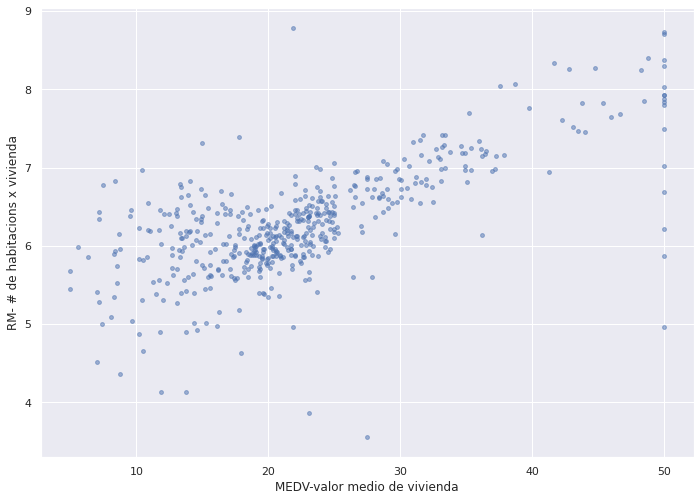

In [ ]:
X = boston['MEDV']
y = boston['RM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RM- # de habitacions x vivienda')
plt.show()

LSTAT vs MEDV

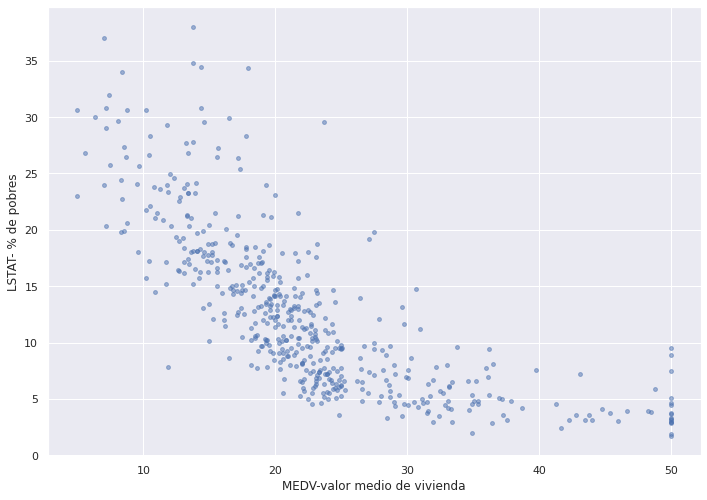

In [ ]:
X = boston['MEDV']
y = boston['LSTAT']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('LSTAT- % de pobres')
plt.show()

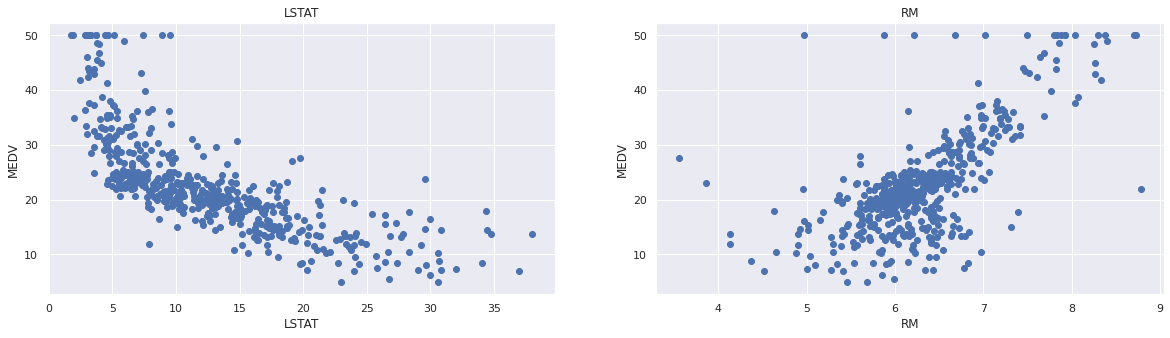

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

##8. Preparación de los datos para el entrenamiento del modelo

Regresión lineal:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)

Concatenamos las columnas que seleccionamos para entrenar: X = LSTAT y RM Y = MEDV

In [ ]:
#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

##9. Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

El limite maximo que uno debe dejar es 50/50. Para evitar que los datos de entrenamiento sean mayores a los de prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=24)
print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))


x75%: (404, 2), x25%: (102, 2)
y75%: (404,), y25%: (102,)


##10. Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

##11. Evaluación del modelo
Evaluamos el modelo utilisando RMSE y R2-score

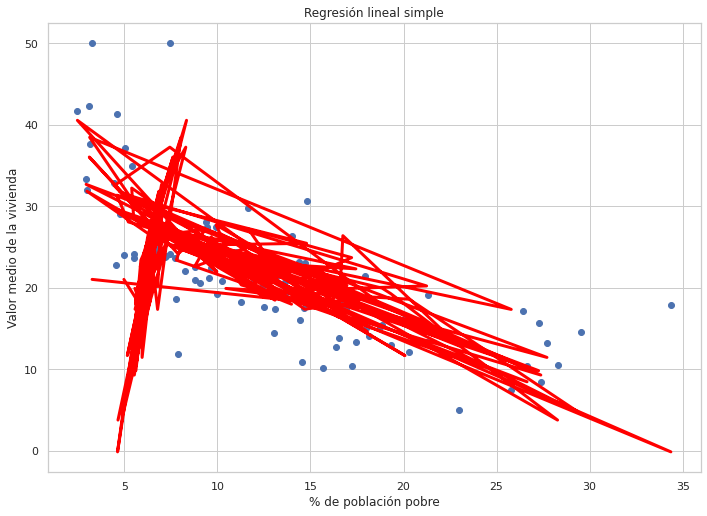


 PRESICIÓN DEL MODELO: REGRESIÓN LINEAL SIMPLE
0.6631233644816109


In [ ]:
#poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['LSTAT'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión lineal simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO: REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento. ")
print("------------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es{}'.format(r2))
print('\n')

#model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("RMSE es {}".format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento. 
------------------------------------------
RMSE es 5.458613862885432
R2 resultado es0.6631233644816109


El rendimiento del modelo para el conjunto de pruebas
RMSE es 5.823456038894686
R2 resultado es 0.4993345278966549


##Regresión lineal entrenado con todas las caracteristicas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
boston_data = datasets.load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


comparamos variables unas con otras y a ojo descartamos o no?

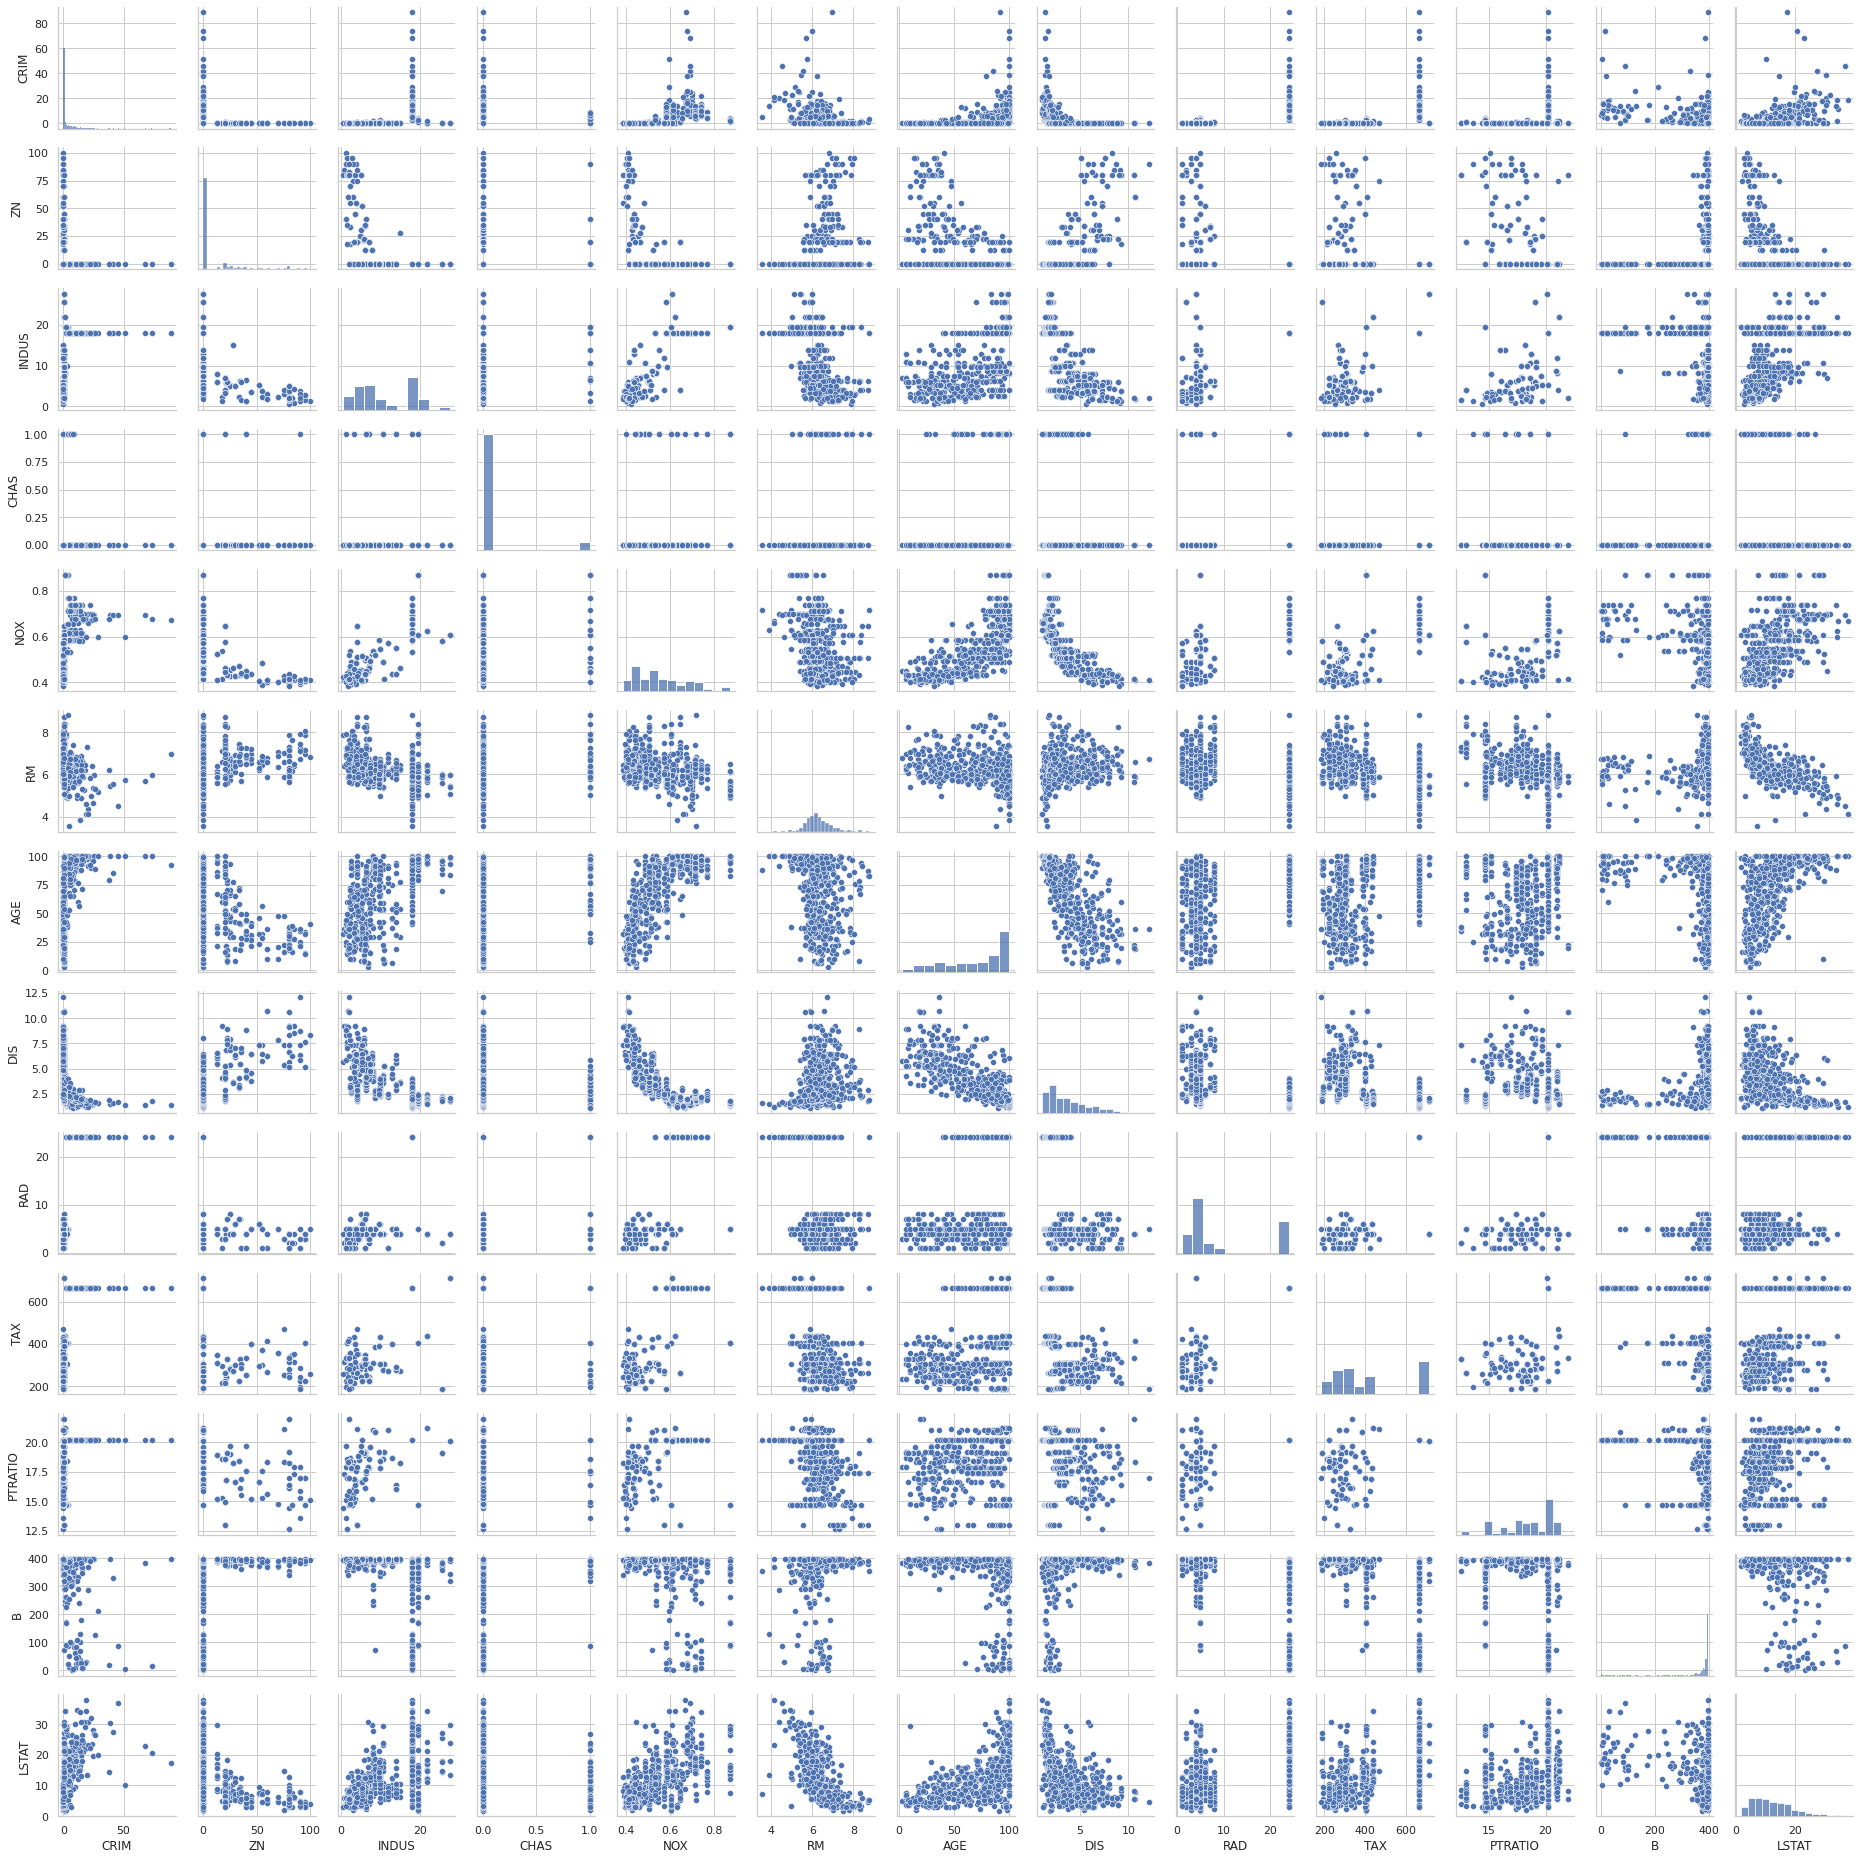

In [ ]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
features_plot = boston_data.feature_names
sns.pairplot(boston_df[features_plot], height=2.0);
plt.tight_layout()
plt.show()

Separar los datos (TRAIN,TEST)

In [ ]:
scalar = StandardScaler()
y = boston_data.target
X = boston_df.values            #Tomaremos todas las columnas para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("TRAIN--> X: {} - Y: {}".format(X_train.shape, y_train.shape))
print("TEST--> X: {} - Y: {}".format(X_test.shape, y_test.shape))

TRAIN--> X: (253, 13) - Y: (253,)
TEST--> X: (253, 13) - Y: (253,)


##Aplicar regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train, y_train)
#predecimos
pred = regressor.predict(X_test)

visualizar la regrsión

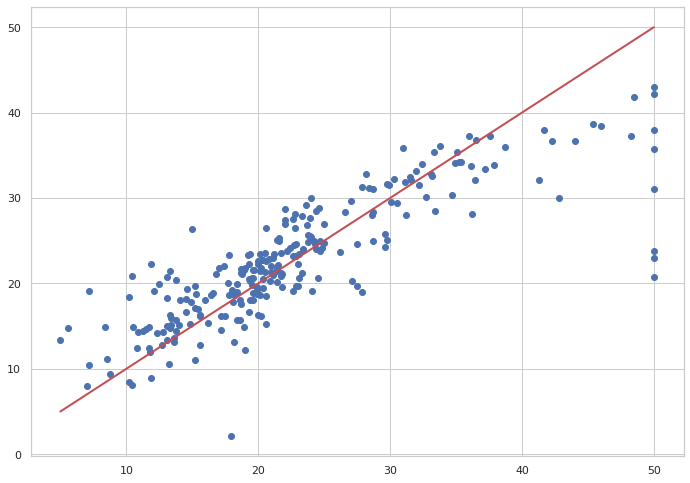

Precisión del modelo: 0.6986324793587051


In [ ]:
#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: " + str(regressor.score(X_test, y_test)))

## Entrenando con el nivel de status (LSTAT)

###Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

###Cargamos los datos de la biblioteca scikit-learn

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### Preparación de los datos para el entrenamiento del modelo

Regresión lineal:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)

Concatenamos las columnas que seleccionamos para entrenar: X = LSTAT y RM Y = MEDV

In [ ]:
#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['INDUS'], boston['MEDV']], columns = ['INDUS','MEDV'])
Y = boston['LSTAT']

### Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

El limite maximo que uno debe dejar es 50/50. Para evitar que los datos de entrenamiento sean mayores a los de prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=24)
print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))


x75%: (404, 2), x25%: (102, 2)
y75%: (404,), y25%: (102,)


### Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

### Evaluación del modelo
Evaluamos el modelo utilisando RMSE y R2-score

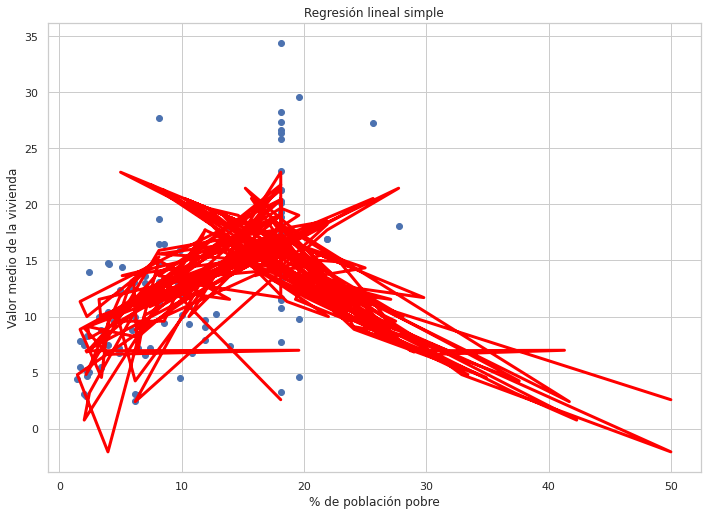


 PRESICIÓN DEL MODELO: REGRESIÓN LINEAL SIMPLE
0.6252783800289962


In [ ]:
#poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['INDUS'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión lineal simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO: REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento. ")
print("------------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es{}'.format(r2))
print('\n')

#model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("RMSE es {}".format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento. 
------------------------------------------
RMSE es 4.423264451005399
R2 resultado es0.6252783800289962


El rendimiento del modelo para el conjunto de pruebas
RMSE es 4.1844092667570045
R2 resultado es 0.6160226488888495
